**1) Install and Import Dependencies**

In [1]:
!pip3 install torch torchvision torchaudio
!pip install easyocr
!pip install opencv-python-headless==4.1.2.30
!pip install opencv-python

     |████████████████████████████████| 63.6 MB 1.6 MB/s 
     |████████████████████████████████| 47.7 MB 1.1 MB/s 
     |████████████████████████████████| 21.8 MB 1.3 MB/s 
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.5.5.62
    Uninstalling opencv-python-headless-4.5.5.62:
      Successfully uninstalled opencv-python-headless-4.5.5.62


In [6]:
import easyocr

In [7]:
import cv2

In [2]:
from matplotlib import pyplot as plt
import numpy as np

**2) Read in images**

In [12]:
IMAGE_PATH = '/content/sign1.jpg'

In [13]:
reader = easyocr.Reader(['en'],gpu=False)
result = reader.readtext(IMAGE_PATH)
result

Using CPU. Note: This module is much faster with a GPU.


[([[34, 3], [218, 3], [218, 53], [34, 53]], 'CAUTION', 0.9985252526119184),
 ([[103, 58], [202, 58], [202, 97], [103, 97]], 'HEAVY', 0.9989877575944034),
 ([[72, 87], [239, 87], [239, 127], [72, 127]],
  'PEDESTRIAN',
  0.9999730085305846),
 ([[94, 120], [211, 120], [211, 158], [94, 158]],
  'TRAFFIC',
  0.9997822174104058)]

**3) Draw Results**

In [14]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

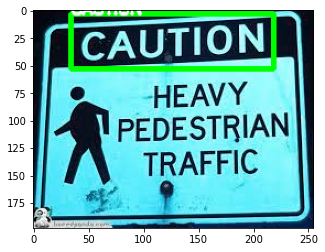

In [15]:
img = cv2.imread(IMAGE_PATH)
img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
img = cv2.putText(img,text,top_left, font, 0.5,(255,255,255),2,cv2.LINE_AA)
plt.imshow(img)
plt.show()

**4) Handling Multiple Lines**

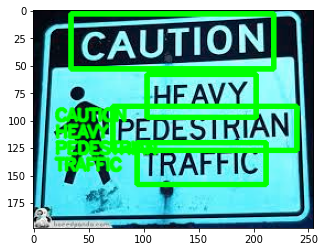

In [16]:
img = cv2.imread(IMAGE_PATH)
spacer = 100
for detection in result: 
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
    img = cv2.putText(img,text,(20,spacer), font, 0.5,(0,255,0),2,cv2.LINE_AA)
    spacer+=15
    
plt.imshow(img)
plt.show()